In [74]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md
from ipynb.fs.full import functions
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [75]:
from matplotlib.figure import Figure
import numpy as np
from scipy.stats import ks_1samp, norm, ttest_rel
from os import path, makedirs

In [76]:
ticker_prices_filename = 'ticker_prices_transformed.xlsx'
ticker_prices_excel_book = pd.read_excel(io=ticker_prices_filename, header=[0,1], index_col=0, sheet_name=None)

market_prices_filename = 'market_prices_transformed.xlsx'
market_prices_excel_book = pd.read_excel(io=market_prices_filename, index_col=0, sheet_name=None)

formation_filename = 'output_formation.xlsx'
formation_excel_book = pd.read_excel(io=formation_filename, header=[0,1], index_col=0, sheet_name=None)

Exception ignored in: <function ZipFile.__del__ at 0x7fe945dc39a0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1819, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1836, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [77]:
def generate_observation_aggregated_df(observation_df: pd.DataFrame) -> pd.DataFrame:
    observation_aggr_list = []
    car = 0
    for index, row in observation_df.iterrows():
      u_series = row[:, functions.observation_param_name_for_u]
      ar = u_series.mean()
      car += ar

      observation_aggr_list.append({
          'period': index,
          'ar': ar,
          'car': car,
      })

    observation_aggr_df = pd.DataFrame(observation_aggr_list)
    observation_aggr_df = observation_aggr_df.pivot_table(index='period')
    return observation_aggr_df


In [78]:
def generate_winner_loser_comparison(winner_obs_aggr_df: pd.DataFrame, loser_obs_aggr_df: pd.DataFrame) -> pd.DataFrame:
    winner_car_series = winner_obs_aggr_df['car']
    loser_car_series = loser_obs_aggr_df['car']

    winner_loser_comparison = pd.concat({'car_winner': winner_car_series, 'car_loser': loser_car_series}, axis=1)
    return winner_loser_comparison


In [79]:
def plot_car_winner_loser(winner_loser_comparison: pd.DataFrame, case_code: str) -> Figure:
    title = f'CAR Movement on the Case {case_code}'
    fig = winner_loser_comparison.plot(title=title, ylabel='CAR', xlabel='Period', grid=True, style=['o-','^-'],
                                 xticks=winner_loser_comparison.index).get_figure()
    return fig

**Case Code: PRO-1**

Comparison

,car_winner,car_loser
period,,
1,0.007675,0.003222
2,0.017823,0.002298
3,0.016121,0.005661
4,0.015814,-0.000001
5,0.021181,-0.001837
6,0.020754,-0.001677
7,0.026883,-0.004720
8,0.040897,-0.005381
9,0.038497,-0.007099


**Case Code: PRO-2**

Comparison

,car_winner,car_loser
period,,
1,-0.003131,0.005701
2,-0.003322,0.010806
3,-0.008106,0.018421
4,-0.009259,0.018960
5,-0.001981,0.021476
6,0.002191,0.029089
7,0.000625,0.030913
8,-0.006484,0.026838
9,-0.004501,0.037873


**Case Code: PRO-3**

Comparison

,car_winner,car_loser
period,,
1,-0.002876,-0.003437
2,-0.000089,0.008449
3,-0.006205,-0.000470
4,0.000237,-0.001074
5,-0.005413,-0.014888
6,0.000905,-0.010873
7,-0.000387,-0.019501
8,-0.003585,-0.024293
9,0.003237,-0.025418


**Case Code: PRO-4**

Comparison

,car_winner,car_loser
period,,
1,-0.005951,0.015104
2,-0.001035,0.020306
3,-0.000555,0.016702
4,-0.010332,0.003439
5,-0.012053,0.004826
6,-0.012826,0.002387
7,-0.009532,0.000817
8,-0.006989,0.007707
9,-0.007858,0.003532


**Case Code: CON-1**

Comparison

,car_winner,car_loser
period,,
1,-0.006198,-0.002519
2,-0.011465,-0.004468
3,-0.025545,0.013517
4,-0.037249,0.013726
5,-0.032997,0.008525
6,-0.046171,0.004170
7,-0.048322,0.004875
8,-0.045818,0.000097
9,-0.037409,0.002049


**Case Code: CON-2**

Comparison

,car_winner,car_loser
period,,
1,-0.010610,-0.005275
2,-0.025530,0.002913
3,-0.022356,-0.010033
4,-0.024300,0.012793
5,-0.037893,0.020288
6,-0.047309,0.016899
7,-0.063804,0.017795
8,-0.066595,0.008199
9,-0.075578,0.006958


**Case Code: CON-3**

Comparison

,car_winner,car_loser
period,,
1,0.001666,0.119594
2,-0.006564,0.116784
3,-0.011639,0.113685
4,-0.010978,0.116459
5,-0.010974,0.114041
6,-0.014796,0.116884
7,-0.016170,0.103950
8,-0.009598,0.110830
9,-0.011637,0.104651


**Case Code: CON-4**

Comparison

,car_winner,car_loser
period,,
1,-0.003166,0.000972
2,0.006838,0.014507
3,0.007184,0.016118
4,0.008090,0.025415
5,0.010910,0.030422
6,0.020524,0.031799
7,0.014359,0.031101
8,0.010987,0.030827
9,0.006804,0.032272


**ACAR Movement on the PRO Event**

**ACAR Movement on the CON Event**

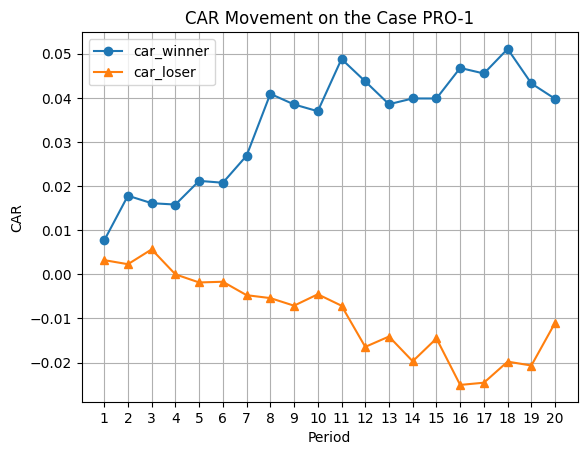

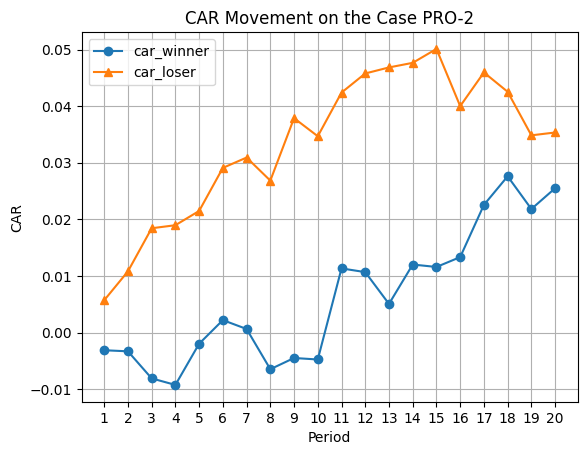

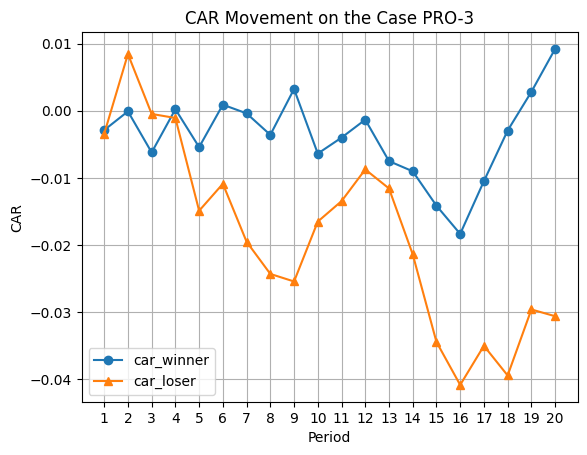

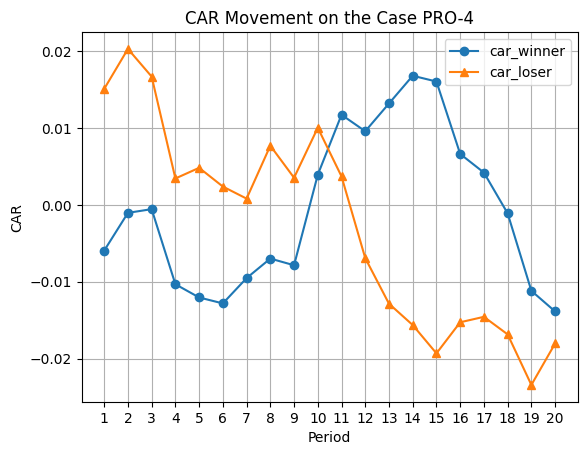

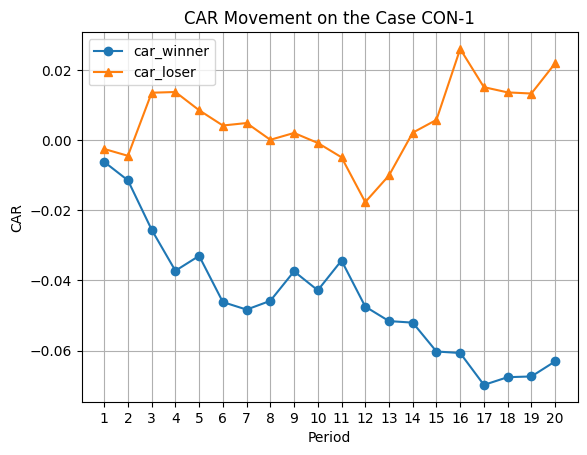

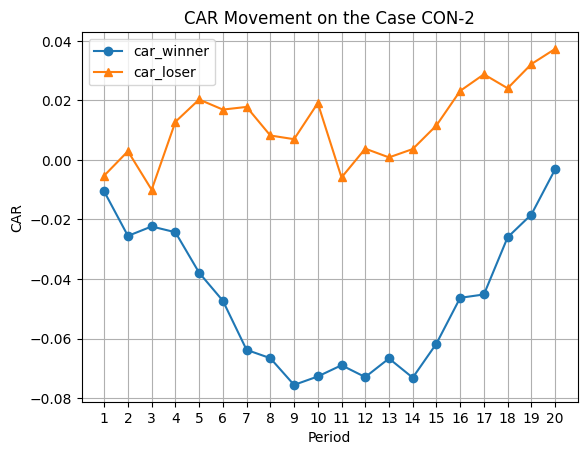

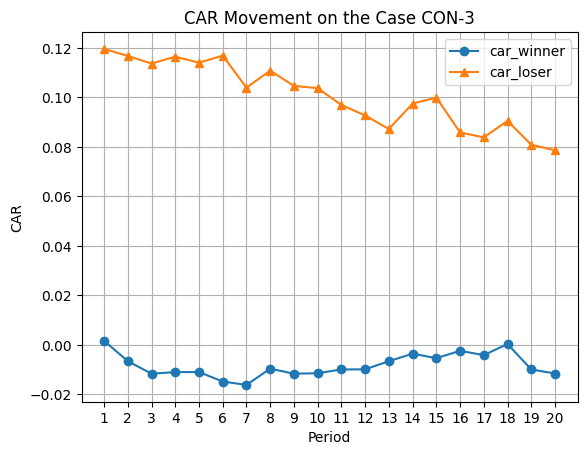

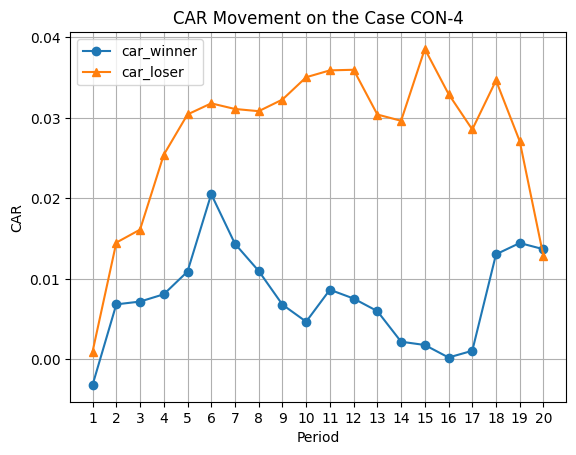

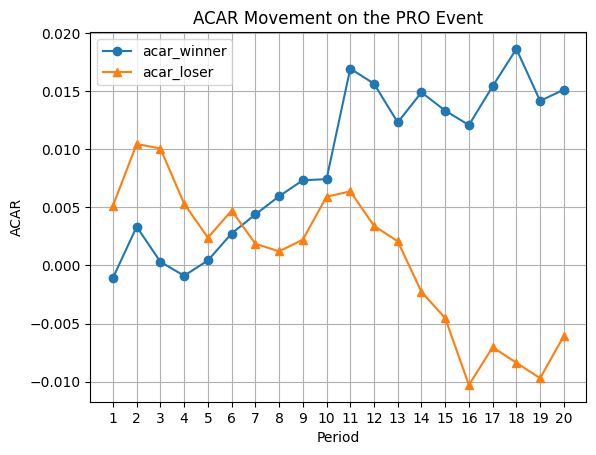

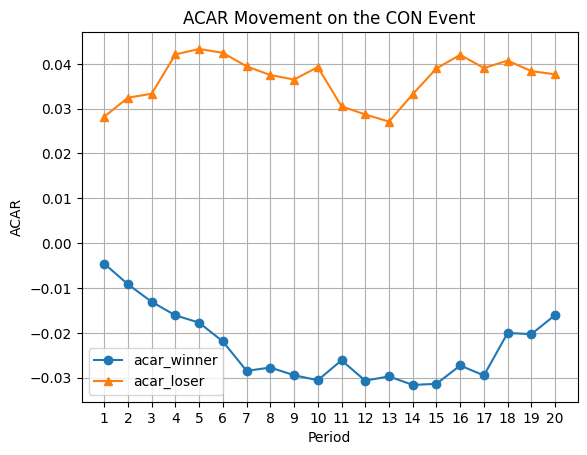

In [80]:
price_column_name = 'price'

first_period_of_price = 0
last_period_of_price = 20

acar_dict = {'PRO': [], 'CON': []}
input_t_test_dict = {
    'PRO': {
        'winner': [],
        'loser': [],
    },
    'CON': {
        'winner': [],
        'loser': [],
    },
}
car_figure_list = []
acar_figure_list = []

output_winner_loser_obs_list = []
output_winner_loser_obs_aggr_list = []

for case in market_prices_excel_book.keys():
    pro_or_con = case.split(sep='-')[0]

    formation_df = formation_excel_book[case]
    ticker_prices = ticker_prices_excel_book[case]

    factor = int(len(formation_df.columns.levels[0]) / 5)
    ticker_list = formation_df.columns.unique(level=0).to_list()
    winner_ticker_list = ticker_list[:factor]
    loser_ticker_list = ticker_list[-factor:]

    market_return = functions.calculate_market_return(market_price_df=market_prices_excel_book[case],
                                                      first_period_of_price=first_period_of_price, 
                                                      last_period_of_price=last_period_of_price)

    tickers_first_index = ticker_prices_excel_book[case].index.get_loc(first_period_of_price)
    tickers_last_index = ticker_prices_excel_book[case].index.get_loc(last_period_of_price)
    tickers_testing_prices = ticker_prices_excel_book[case].copy()[price_column_name]\
        .iloc[tickers_first_index:tickers_last_index+1]

    winner_ticker_prices = tickers_testing_prices[winner_ticker_list]
    loser_ticker_prices = tickers_testing_prices[loser_ticker_list]

    winner_ticker_return = winner_ticker_prices.copy().ffill().pct_change()[1:]
    loser_ticker_return = loser_ticker_prices.copy().ffill().pct_change()[1:]

    winner_observation_df = functions.init_observation_df(winner_ticker_return)
    loser_observation_df = functions.init_observation_df(loser_ticker_return)

    winner_observation_df = functions.calculate_u(winner_observation_df, market_return)
    loser_observation_df = functions.calculate_u(loser_observation_df, market_return)

    output_winner_loser_obs_list.append({
        'sheet_name': f'{case}-WINNER',
        'data_frame': winner_observation_df,
    })
    output_winner_loser_obs_list.append({
        'sheet_name': f'{case}-LOSER',
        'data_frame': loser_observation_df,
    })

    winner_obs_aggr_df = generate_observation_aggregated_df(winner_observation_df)
    loser_obs_aggr_df = generate_observation_aggregated_df(loser_observation_df)

    output_winner_loser_obs_aggr_list.append({
        'sheet_name': f'{case}-WINNER',
        'data_frame': winner_obs_aggr_df,
    })
    output_winner_loser_obs_aggr_list.append({
        'sheet_name': f'{case}-LOSER',
        'data_frame': loser_obs_aggr_df,
    })

    input_t_test_dict[pro_or_con]['winner'].append(winner_obs_aggr_df)
    input_t_test_dict[pro_or_con]['loser'].append(loser_obs_aggr_df)

    winner_loser_comparison = generate_winner_loser_comparison(winner_obs_aggr_df=winner_obs_aggr_df, 
                                                               loser_obs_aggr_df=loser_obs_aggr_df)

    md(f'**Case Code: {case}**')
    md('Comparison')
    winner_loser_comparison
    
    car_fig = plot_car_winner_loser(winner_loser_comparison=winner_loser_comparison, case_code=case)
    car_figure_list.append({
        'filename': f'car-{case.lower()}.jpg',
        'figure': car_fig
    })

    acar_dict[pro_or_con].append(winner_loser_comparison)

for pro_or_con in acar_dict.keys():
    title = f'ACAR Movement on the {pro_or_con} Event'
    md(f'**{title}**')
    acar = pd.concat(objs=acar_dict[pro_or_con]).groupby(level=0).mean()
    acar = acar.copy().rename(columns={'car_winner': 'acar_winner', 'car_loser': 'acar_loser'})
    acar_fig = acar.plot(title=title, ylabel='ACAR', xlabel='Period', grid=True, style=['o-','^-'], 
                         xticks=acar.index).get_figure()
    acar_figure_list.append({
        'filename': f'acar-{pro_or_con.lower()}.jpg',
        'figure': acar_fig
    })
    

In [81]:
def symbolize(p_value: float) -> str:
  if p_value <= .001:
    return '***'
  elif p_value <= .01:
    return '**'
  elif p_value <= .05:
    return '*'
  else:
    return ''

In [82]:
output_t_test_dict = {
    "PRO": None,
    "CON": None,
}

period_list = []

for pro_or_con in input_t_test_dict.keys():
    md(f'**For the {pro_or_con} Event**')

    t_test_dict = {}

    car_arbitrage_dict = {
        "winner": [],
        "loser": [],
    }
    acar_arbitrage_dict = {
        "winner": [],
        "loser": [],
    }

    for winner_or_loser in input_t_test_dict[pro_or_con].keys():
        if not period_list:
            period_list = input_t_test_dict[pro_or_con][winner_or_loser][0].index.to_list()
        
        aar_list = []
        t_stat_list = []
        p_value_list = []
        symbol_list = []
        car_list_list = []
        acar_list = []

        for i, _ in input_t_test_dict[pro_or_con][winner_or_loser][0].iterrows():
            car_per_period_list = [x['car'].loc[i] for x in input_t_test_dict[pro_or_con][winner_or_loser]]
            acar = np.mean(car_per_period_list)
            acar_arbitrage_dict[winner_or_loser].append(acar)

            ar_per_period_list = [x['ar'].loc[i] for x in input_t_test_dict[pro_or_con][winner_or_loser]]
            aar = np.mean(ar_per_period_list)
            
            t_stat, p_value = ks_1samp(x=ar_per_period_list, cdf=norm.cdf)
            symbol = symbolize(p_value=p_value)

            acar_list.append(acar)
            aar_list.append(aar)
            t_stat_list.append(t_stat)
            p_value_list.append(p_value)
            symbol_list.append(symbol)
            car_list_list.append(car_per_period_list)
        
        t_test_role_dict = {
            'acar': acar_list,
            'aar': aar_list,
            't_stat': t_stat_list,
            'p_value': p_value_list,
            'symbol': symbol_list,
        }
        car_arbitrage_dict[winner_or_loser] = car_list_list
        t_test_dict[winner_or_loser] = t_test_role_dict

    t_test_dict['arbitrage'] = {
        'acar': [],
        't_stat': [],
        'p_value': [],
        'symbol': [],
    }

    for _i, _ in enumerate(acar_arbitrage_dict['winner']):
        acar_arbitraged = acar_arbitrage_dict['loser'][_i] - acar_arbitrage_dict['winner'][_i]
        t_test_dict['arbitrage']['acar'].append(acar_arbitraged)

        t_stat, p_value = ttest_rel(a=car_arbitrage_dict['loser'][_i], b=car_arbitrage_dict['winner'][_i])
        symbol = symbolize(p_value=p_value)
        t_test_dict['arbitrage']['t_stat'].append(t_stat)
        t_test_dict['arbitrage']['p_value'].append(p_value)
        t_test_dict['arbitrage']['symbol'].append(symbol)

    t_test_reformed = {(outer_key, inner_key): values for outer_key, inner_dict in t_test_dict.items() \
                       for inner_key, values in inner_dict.items()}
    t_test_df = pd.DataFrame.from_dict(t_test_reformed, orient='index').transpose()
    t_test_df.columns = pd.MultiIndex.from_tuples(t_test_df.columns)
    t_test_df['period'] = period_list
    t_test_df = t_test_df.copy().set_index(keys='period', drop=True)
    
    t_test_df

    output_t_test_dict[pro_or_con] = t_test_df.copy()


**For the PRO Event**

winner                                          loser            \
            acar       aar    t_stat   p_value symbol      acar       aar   
period                                                                      
1      -0.001071 -0.001071  0.497626  0.191417         0.005147  0.005147   
2       0.003344  0.004415  0.499924  0.187624         0.010465  0.005317   
3       0.000314  -0.00303  0.499808  0.187812         0.010078 -0.000386   
4      -0.000885 -0.001199   0.49743  0.191745         0.005331 -0.004747   
5       0.000434  0.001319  0.497746  0.191215         0.002394 -0.002937   
6       0.002756  0.002323  0.499692  0.188002         0.004732  0.002337   
7       0.004397  0.001641  0.499375  0.188519         0.001877 -0.002854   
8        0.00596  0.001562  0.497164  0.192193         0.001218 -0.000659   
9       0.007344  0.001384  0.499043  0.189065         0.002222  0.001004   
10      0.007436  0.000092  0.496165  0.193885         0.005926  0.003704   
11      0.016964  0.009528  0.500948  0.185964         0.006384  0.000458   
12      0.015663 -0.001301  0.498933  0.189246         0.003418 -0.002966   
13      0.012328 -0.003335  0.498558  0.189865         0.002079 -0.001339   
14      0.014917  0.002589  0.499395  0.188486        -0.002264 -0.004343   
15      0.013338 -0.001579  0.500002  0.187497        -0.004542 -0.002277   
16      0.012097 -0.001241   0.49724  0.192065        -0.010289 -0.005747   
17      0.015447   0.00335  0.499031  0.189084        -0.007042  0.003247   
18      0.018658  0.003211  0.497883  0.190988        -0.008378 -0.001336   
19      0.014178  -0.00448    0.4977  0.191293        -0.009711 -0.001332   
20      0.015149  0.000972  0.498609  0.189781        -0.006064  0.003647   

                                  arbitrage                             
          t_stat   p_value symbol      acar    t_stat   p_value symbol  
period                                                                  
1       0.498629  0.189748         0.006218  1.095275  0.353451         
2       0.499631  0.188101          0.00712  0.891117  0.438517         
3       0.496962  0.192533         0.009764  1.225049  0.307969         
4       0.499785   0.18785         0.006216  0.654261  0.559625         
5       0.498996  0.189141         0.001961  0.179025  0.869326         
6       0.499027  0.189091         0.001975  0.172085  0.874324         
7       0.499272  0.188688         -0.00252 -0.179571  0.868933         
8       0.498088  0.190644        -0.004742 -0.266226  0.807314         
9       0.498334  0.190236        -0.005122 -0.258252  0.812916         
10      0.498725  0.189589        -0.001509 -0.089584  0.934264         
11      0.497472  0.191675         -0.01058 -0.594824   0.59384         
12      0.498116  0.190598        -0.012245 -0.626874  0.575204         
13      0.499065  0.189029        -0.010249 -0.512834  0.643441         
14      0.499676  0.188028        -0.017181 -0.855407  0.455205         
15      0.497937  0.190897         -0.01788 -0.891604  0.438293         
16      0.498385  0.190151        -0.022386 -1.113388  0.346721         
17        0.5002  0.187175         -0.02249 -1.176212  0.324349         
18      0.498237  0.190397        -0.027036 -1.500224   0.23053         
19       0.49693  0.192587        -0.023888 -1.469228  0.238102         
20      0.499599  0.188153        -0.021214 -1.478034  0.235923

**For the CON Event**

winner                                          loser            \
            acar       aar    t_stat   p_value symbol      acar       aar   
period                                                                      
1      -0.004577 -0.004577  0.499335  0.188585         0.028193  0.028193   
2       -0.00918 -0.004603  0.496009  0.194151         0.032434  0.004241   
3      -0.013089 -0.003909  0.498734  0.189575         0.033322  0.000888   
4      -0.016109  -0.00302  0.499639  0.188088         0.042098  0.008776   
5      -0.017738 -0.001629  0.498303  0.190287         0.043319  0.001221   
6      -0.021938   -0.0042  0.496165  0.193886         0.042438 -0.000881   
7      -0.028484 -0.006546  0.500548  0.186611          0.03943 -0.003008   
8      -0.027756  0.000728  0.498655  0.189705         0.037488 -0.001942   
9      -0.029455 -0.001699  0.496645  0.193069         0.036482 -0.001006   
10     -0.030581 -0.001127  0.498867  0.189355         0.039268  0.002786   
11     -0.026141  0.004441  0.500613  0.186506         0.030511 -0.008757   
12     -0.030679 -0.004538  0.499979  0.187535         0.028699 -0.001812   
13     -0.029721  0.000958  0.498351  0.190207         0.027103 -0.001596   
14     -0.031627 -0.001907  0.498779    0.1895         0.033225  0.006122   
15     -0.031384  0.000243  0.496716  0.192949         0.038964  0.005739   
16     -0.027292  0.004093  0.499381   0.18851         0.042004   0.00304   
17     -0.029515 -0.002223  0.499551  0.188231         0.039061 -0.002943   
18     -0.020041  0.009473   0.50088  0.186073         0.040708  0.001646   
19     -0.020298 -0.000257  0.496947  0.192559         0.038364 -0.002344   
20     -0.016037  0.004261  0.499348  0.188564         0.037652 -0.000712   

                                  arbitrage                             
          t_stat   p_value symbol      acar    t_stat   p_value symbol  
period                                                                  
1       0.497896  0.190966          0.03277  1.154369  0.331958         
2       0.498879  0.189335         0.041614  1.502566  0.229969         
3       0.494835   0.19617         0.046411  1.709199  0.185946         
4       0.500083  0.187365         0.058207  2.416532  0.094462         
5       0.497925  0.190917         0.061057  2.684754  0.074746         
6       0.498866  0.189356         0.064376  2.567082  0.082703         
7       0.499643  0.188082         0.067914    3.1031  0.053167         
8       0.497255  0.192039         0.065244  3.027891  0.056405         
9       0.499221  0.188772         0.065937  3.182976   0.04998      *  
10      0.498863  0.189362         0.069849  3.465469  0.040479      *  
11       0.49966  0.188053         0.056652  3.039448  0.055892         
12      0.496136  0.193935         0.059378  3.252088  0.047415      *  
13      0.497782  0.191156         0.056824  3.741214  0.033317      *  
14      0.499691  0.188004         0.064852  4.125696  0.025822      *  
15      0.500971  0.185926         0.070348  4.998813  0.015402      *  
16      0.494391  0.196942         0.069296  5.366969  0.012662      *  
17      0.497779   0.19116         0.068576  4.889119  0.016366      *  
18      0.498131  0.190573         0.060749  3.887622  0.030169      *  
19      0.496759  0.192877         0.058662  3.339229  0.044413      *  
20      0.496567  0.193203         0.053688   2.51578  0.086497

In [83]:
with pd.ExcelWriter('output_testing_winner-loser_observation.xlsx') as excel_writer:
    for i in output_winner_loser_obs_list:
        df = i['data_frame']
        sheet_name = i['sheet_name']
        df.to_excel(excel_writer=excel_writer, sheet_name=sheet_name)

with pd.ExcelWriter('output_testing_winner-loser_observation_aggregated.xlsx') as excel_writer:
    for i in output_winner_loser_obs_aggr_list:
        df = i['data_frame']
        df.index = df.index.map(str)
        sheet_name = i['sheet_name']
        df.to_excel(excel_writer=excel_writer, sheet_name=sheet_name)

with pd.ExcelWriter('output_testing_t-test_result.xlsx') as excel_writer:
    for event in output_t_test_dict.keys():
        df = output_t_test_dict[event]
        df.to_excel(excel_writer=excel_writer, sheet_name=event)


In [84]:
figure_path = 'figure'
if not path.exists(figure_path):
    makedirs(figure_path)

for row in acar_figure_list:
    filename = row['filename']
    filepath = path.join(figure_path, filename)
    fig = row['figure']
    fig.savefig(filepath)

for row in car_figure_list:
    filename = row['filename']
    filepath = path.join(figure_path, filename)
    fig = row['figure']
    fig.savefig(filepath)